In [2]:
import matplotlib.pyplot as plt
import subprocess
import numpy as np
import pickle
import torch

%matplotlib inline

In [3]:
import seaborn as sns
sns.set_palette('bright')
cols = sns.color_palette('bright')

In [4]:
with open('../saved-experiments/resnet_width_logs.pkl', 'rb') as handle:
    plotting_dict = pickle.load(handle)

In [5]:
output_ordering = np.array(plotting_dict['logs_order'])
output_log = plotting_dict['logs']
hessian_eff_dim_list = plotting_dict['hessian_eff_dim']
xaxis = plotting_dict['xaxis']

In [6]:
resnet_path_norms = torch.load("../experiments/gen-bounds/resnet_path_norms.pt")
std_path_norm = (resnet_path_norms - resnet_path_norms.mean()).div(resnet_path_norms.std())



In [7]:
std_ED = (hessian_eff_dim_list - hessian_eff_dim_list.mean())/hessian_eff_dim_list.std()

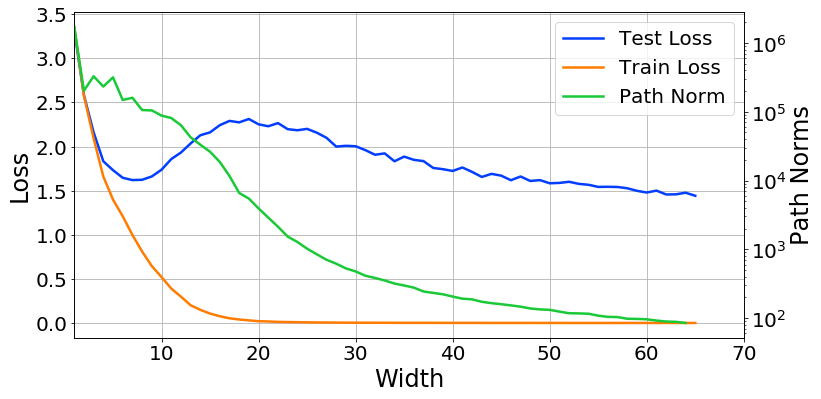

In [8]:
tick_size = 20
ax_fs = 24
leg_fs = 20
lw = 2.5

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(output_ordering[np.argsort(output_ordering)], output_log[np.argsort(output_ordering),4], 
         label = 'Test Loss', color = cols[0], linewidth=lw)
ax.plot(output_ordering[np.argsort(output_ordering)], output_log[np.argsort(output_ordering),2], 
         label = 'Train Loss', color=cols[1], linewidth=lw)

# ax.plot(resnet_path_norms, label="Path Norms", color=cols[3])
#ax.legend()


ax.set_xlabel('Width', fontsize=ax_fs)
ax.set_ylabel('Loss', fontsize=ax_fs)
ax.tick_params('both', labelsize=tick_size)

ax2 = ax.twinx()
# ax2.plot(xaxis, std_ED, label = r'$N_{eff}$(Hessian) (std)',
#         color=cols[2], linewidth=lw)

ax2.plot(resnet_path_norms, label = 'Path Norm',
        color=cols[2], linewidth=lw)


lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(loc='upper right',handles=lines + lines2, labels=labels + labels2, fontsize=leg_fs)
ax2.set_ylabel(r'Path Norms', fontsize=ax_fs)
ax2.tick_params('y', labelsize=tick_size)
ax.set_xlim(1, 70)
ax2.semilogy()
ax.grid()
plt.savefig('./dnn_double_descent.pdf', bbox_inches='tight')